##Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the Dataset

In [ ]:
df = pd.read_csv("wdbc.data", header = None)
df.columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df.drop('ID', axis = 1, inplace = True)
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Encoding the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Diagnosis"] = le.fit_transform(df["Diagnosis"])
class_names = le.classes_

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##Training the Decision Tree model on the Training set

###Decision Tree- Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

###Decision Tree- Entropy

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##Decision Tree (Gini)- Accuracy, Precision, Recall, F-score, confusion matrix

Accuracy      : 0.94
Precision     : 0.94
Recall        : 0.94
F1 Score      : 0.94
Confusion Matrix:
 [[101   7]
 [  3  60]]


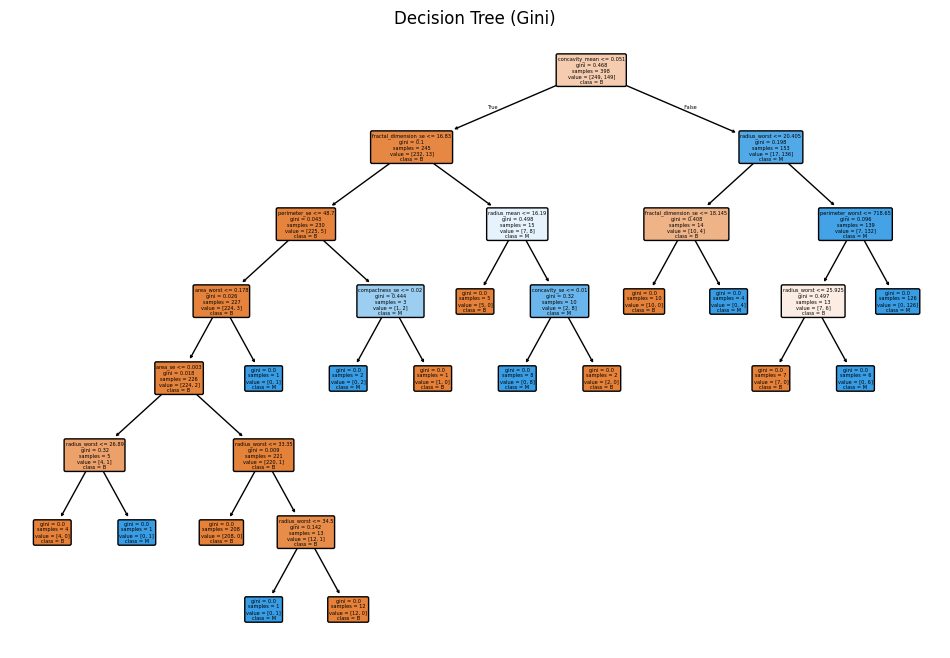

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_g = clf_gini.predict(X_test)

acc_g = accuracy_score(y_test, y_pred_g)
prec_g = precision_score(y_test, y_pred_g, average='weighted')
rec_g = recall_score(y_test, y_pred_g, average='weighted')
f1_g = f1_score(y_test, y_pred_g, average='weighted')
cm_g = confusion_matrix(y_test, y_pred_g)

print(f"Accuracy      : {acc_g:.2f}")
print(f"Precision     : {prec_g:.2f}")
print(f"Recall        : {rec_g:.2f}")
print(f"F1 Score      : {f1_g:.2f}")
print("Confusion Matrix:\n", cm_g)

plt.figure(figsize=(12,8))
plot_tree(clf_gini, feature_names=df.columns[:-1], class_names=class_names,
          filled=True, rounded=True)
plt.title("Decision Tree (Gini)")
plt.show()

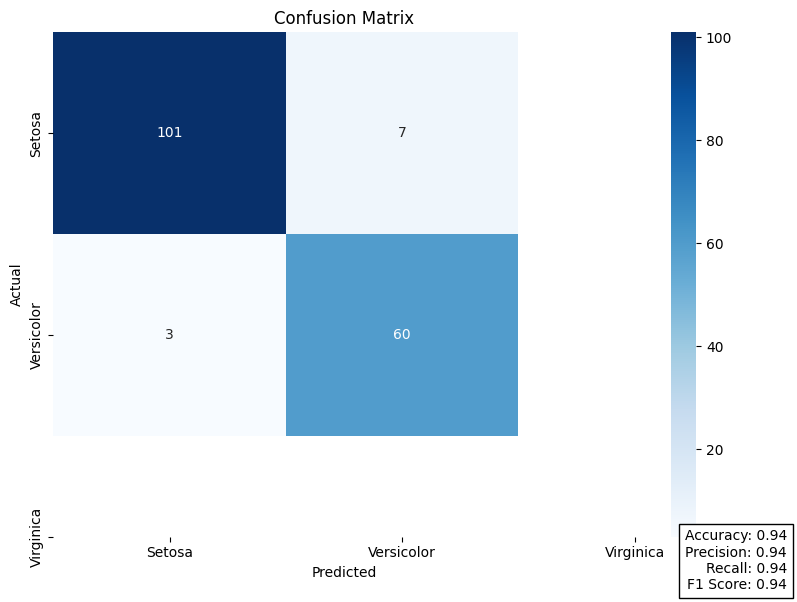

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_g, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc_g:.2f}\nPrecision: {prec_g:.2f}\nRecall: {rec_g:.2f}\nF1 Score: {f1_g:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

##Decision Tree (Entropy)- Accuracy, Precision, Recall, F-score, confusion matrix

Accuracy      : 0.96
Precision     : 0.96
Recall        : 0.96
F1 Score      : 0.96
Confusion Matrix:
 [[106   2]
 [  4  59]]


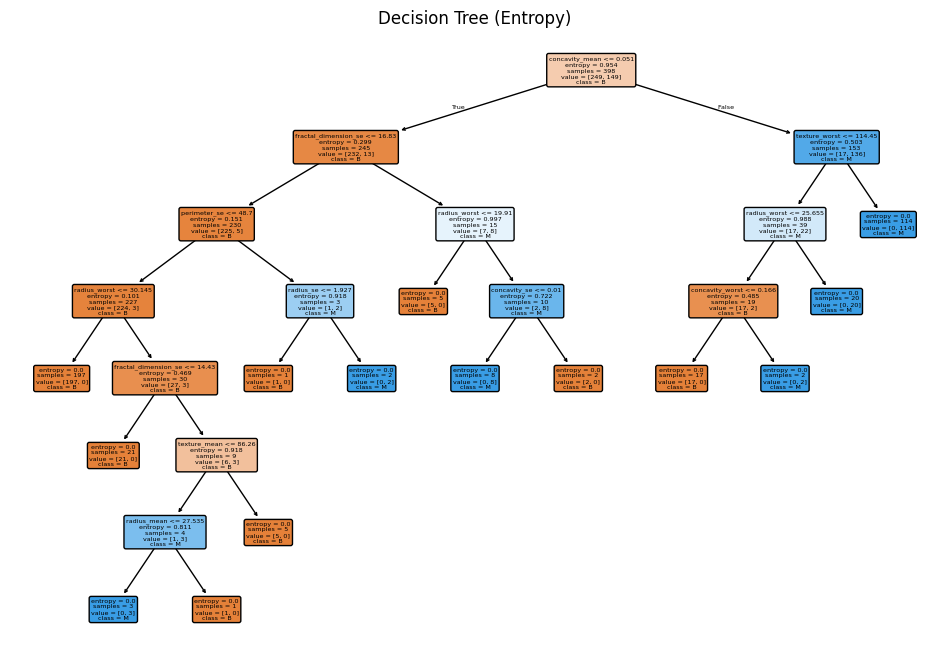

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_e = clf_entropy.predict(X_test)

acc_e = accuracy_score(y_test, y_pred_e)
prec_e = precision_score(y_test, y_pred_e, average='weighted')
rec_e = recall_score(y_test, y_pred_e, average='weighted')
f1_e = f1_score(y_test, y_pred_e, average='weighted')
cm_e = confusion_matrix(y_test, y_pred_e)

print(f"Accuracy      : {acc_e:.2f}")
print(f"Precision     : {prec_e:.2f}")
print(f"Recall        : {rec_e:.2f}")
print(f"F1 Score      : {f1_e:.2f}")
print("Confusion Matrix:\n", cm_e)

plt.figure(figsize=(12,8))
plot_tree(clf_entropy, feature_names=df.columns[:-1], class_names=class_names,
          filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()

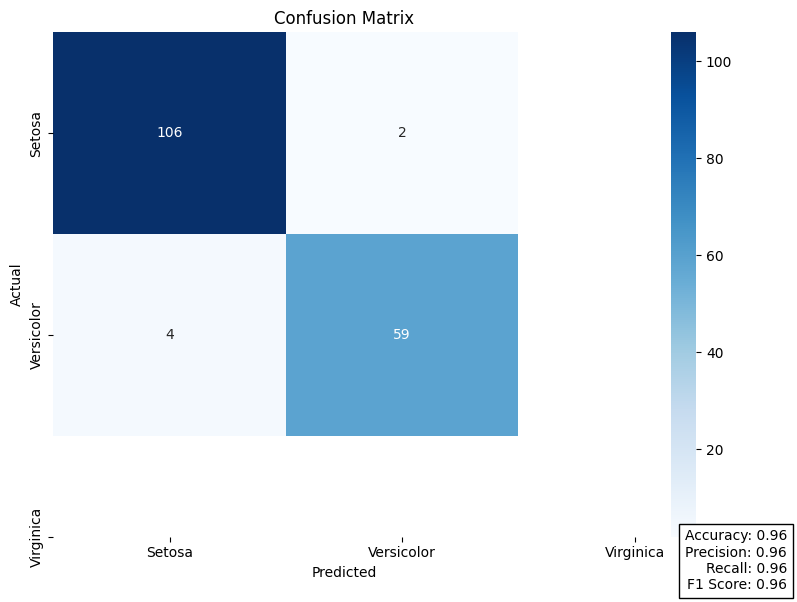

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_e, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc_e:.2f}\nPrecision: {prec_e:.2f}\nRecall: {rec_e:.2f}\nF1 Score: {f1_e:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()